# **TASK-1: Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Done by Niranjan Kumar M.

## STEP-1: Importing useful libraries

In [1]:
import pandas as pd                     #Importing pandas library for data analysis
import numpy as np                      #Importing Numpy library for working with multidimensional arrays
import matplotlib.pyplot as plt         #Importing matplotlib for data visualization
%matplotlib inline      

## STEP-2: Reading data from given file

In [2]:
url = "http://bit.ly/w-data"                  #the url of the given csv file containing data
data = pd.read_csv(url)                       #reading the data using pandas library
print("Data imported successfully")       

Data imported successfully


In [3]:
data.shape                                    #determining the shape of the data set

(25, 2)

In [4]:
data.head()                                   #first 5 values in the data set

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()                                  #last 5 values in the data set

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## STEP-3: Visualising the data

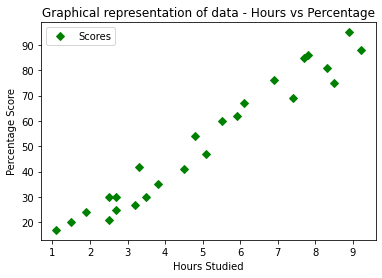

In [7]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='D', color='green')  
plt.title('Graphical representation of data - Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
data.isnull().sum()                                   #returning the number of missing values in the data set

Hours     0
Scores    0
dtype: int64

## STEP-4: Creating a model using Linear Regression algorithm

In [10]:
#dividing the data into "attributes" (inputs) and "labels" (outputs)

x = data.iloc[:,:-1].values  
y = data.iloc[:,1].values 

In [11]:
#splitting the data into training and testing sets

from sklearn.model_selection import train_test_split         
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
 #training the linear regression algorithm

from sklearn.linear_model import LinearRegression           
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

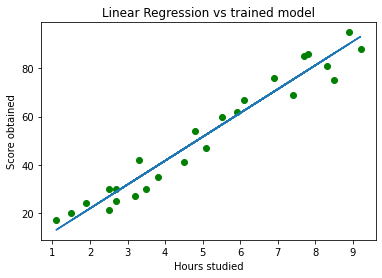

In [13]:
 # Plotting the regression line

line = regression.coef_*x+regression.intercept_             
plt.scatter(x, y,c='green')                               
plt.title('Linear Regression vs trained model')
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')
plt.plot(x, line);
plt.show()

## STEP-5: Predicting the results

In [14]:
y_pred = regression.predict(x_test)                                #predicting the scores using the test data

In [15]:
table = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})    #comparing the original and predicted values
table

,Original,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Question: What will be predicted score if a student studies for 9.25 hrs/ day?

In [16]:
hours=9.25
pred_score=regression.predict([[hours]])
print("score =",pred_score[0])

score = 93.69173248737538


## STEP-6: Calculating the errors

In [17]:
#lets find out the accuracy of the above model

from sklearn.metrics import mean_absolute_error                        #finding mean absolute error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
from sklearn.metrics import mean_squared_error                         #finding root mean square error
print('Root Mean Square Error:', mean_squared_error (y_test, y_pred)**0.5)

Mean Absolute Error: 4.183859899002975
Root Mean Square Error: 4.6474476121003665
